In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

In [402]:
data = pd.read_csv('dataframe/champions.csv')

In [403]:
data.head()

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [404]:
data['Temporada'] = pd.to_datetime(data['Temporada'])
data = data.sort_values(by='Temporada')  # Ordenar por temporada
data.reset_index(drop=True, inplace=True)  # Restablecer el índice

In [405]:
def plot_data(data, equipo):
    equipo_local = data[data['Local'] == equipo].sort_values(by='Temporada')
    equipo_visitante = data[data['Visitante'] == equipo].sort_values(by='Temporada')

    # Restablecer los índices para que sean continuos
    equipo_local.reset_index(drop=True, inplace=True)
    equipo_visitante.reset_index(drop=True, inplace=True)

    # Crear una figura y dos ejes (uno para los goles como local y otro para los goles como visitante)
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Graficar goles como local
    axes[0].plot(equipo_local.index, equipo_local['GolesLocal'], marker='o', linestyle='-', color='blue')
    axes[0].set_ylabel('Goles como Local')
    axes[0].set_title(f'Goles por Partido - Equipo {equipo} (Local)')
    axes[0].grid(True)

    # Graficar goles como visitante
    axes[1].plot(equipo_visitante.index, equipo_visitante['GolesVisitante'], marker='x', linestyle='--', color='green')
    axes[1].set_ylabel('Goles como Visitante')
    axes[1].set_title(f'Goles por Partido - Equipo {equipo} (Visitante)')
    axes[1].grid(True)

    # Ajustar el espaciado entre subgráficos
    plt.tight_layout()
    plt.xlabel('Partido')
    plt.show()

def fit_arima_model(data, equipo, order):
    equipo_data = data[(data['Local'] == equipo) | (data['Visitante'] == equipo)]
    model = ARIMA(equipo_data['GolesLocal'], order=order)
    result = model.fit()
    return result

def forecast_arima(result, steps):
    forecast = result.forecast(steps=steps)
    print(forecast)
    return forecast


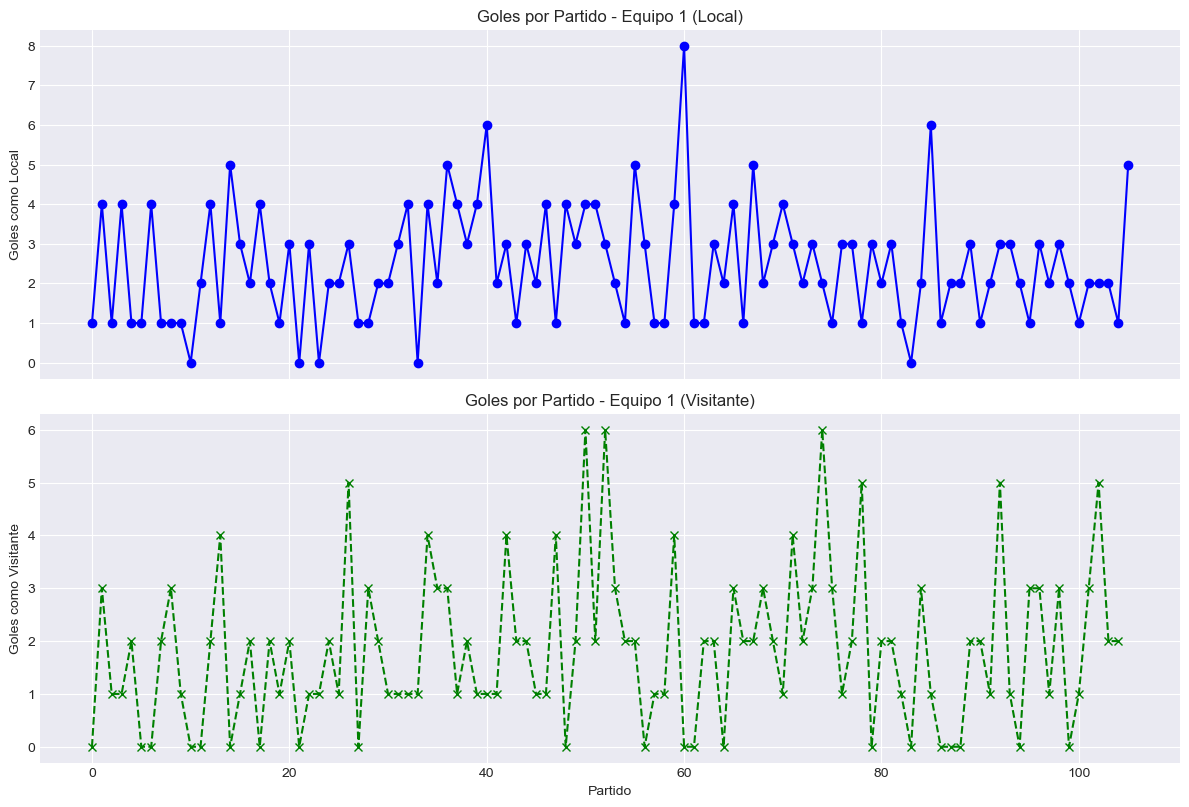

211    1.774946
212    1.820289
213    1.819651
214    1.819660
215    1.819660
Name: predicted_mean, dtype: float64


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/carlotasanchezgonzalez/anaconda3/lib/

In [406]:
# Visualizar la serie temporal para el equipo 1
plot_data(data, equipo=1)

# Ajustar un modelo ARIMA para el equipo 1
modelo = fit_arima_model(data, equipo=1, order=(1,1,1))

# Realizar un pronóstico para el equipo 1
pronostico = forecast_arima(modelo, steps=5)
